In [1]:
from model import *
import matplotlib.pyplot as plt
import numpy as np


from tqdm import tqdm

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

base = lambda x: x
model = KAN(n=1, base=base, G=3).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

print(device)

cuda


# Inference

torch.Size([158]) torch.Size([158])


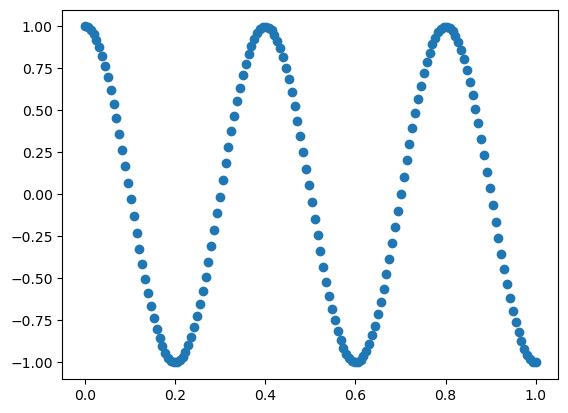

In [3]:
samples = np.arange(0, 5*np.pi, 0.1)
labels = np.cos(samples)

# Normalize Input
samples = samples/max(samples)
samples, labels = torch.from_numpy(samples).to(device), torch.from_numpy(labels).to(device)

criterion = nn.MSELoss()
#plt.scatter(normalized_samples, labels)

print(samples.shape, labels.shape)
plt.scatter(samples.cpu().numpy(), labels.cpu().numpy())

In [4]:
[print(param) for param in model.parameters()]

Parameter containing:
tensor([[0.4625, 0.5917, 0.0878]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[[0.3993, 0.3838, 0.6456],
         [0.3468, 0.7526, 0.5324],
         [0.5497, 0.5000, 0.9429]]], device='cuda:0', requires_grad=True)


[None, None]

In [5]:
EPOCHS=100
losses = []
progess_bar = tqdm(range(EPOCHS))
for epoch in progess_bar:
    running_loss = 0
    total = 0
    for x,y in zip(samples,labels):
        x, y = x.to(device).view(1), y.to(device).view(1)
        y_hat = model(x).view(1)
        
        loss = criterion(y_hat, y)
        running_loss += loss.item()
        total += x.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses.append(running_loss / total)

    progess_bar.set_description(f"Epoch {epoch}: Loss {running_loss / total:.5f}")

Epoch 99: Loss 0.50319: 100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


[0.5344497631519753, 0.5199416619493258, 0.5153188033702696, 0.5130483118931756, 0.5118306454462378, 0.5111104030947489, 0.5106226424535687, 0.5102366157763241, 0.5098882362481103, 0.5095476903162044, 0.5092029168319745, 0.5088509191188936, 0.5084931048332902, 0.5081327886998098, 0.5077738368986019, 0.5074199910772659, 0.5070745348654877, 0.5067401581790559, 0.5064189491130586, 0.5061124269284688, 0.5058216149044267, 0.5055471042919413, 0.5052891396324866, 0.5050476811451591, 0.5048224666833487, 0.5046130644310052, 0.5044189144424537, 0.5042393779940328, 0.5040737625184908, 0.5039213620014062, 0.5037814839896234, 0.5036534821778657, 0.5035367923651816, 0.5034309597410932, 0.5033356767073142, 0.5032508011296071, 0.5031763682172086, 0.5031125537368148, 0.5030595907827887, 0.5030176027005372, 0.5029863751829579, 0.5029651231916666, 0.5029523900443771, 0.5029462135230071, 0.5029445512222139, 0.5029457515476611, 0.5029487759359973, 0.5029531348779517, 0.5029587254776949, 0.5029657117481482,

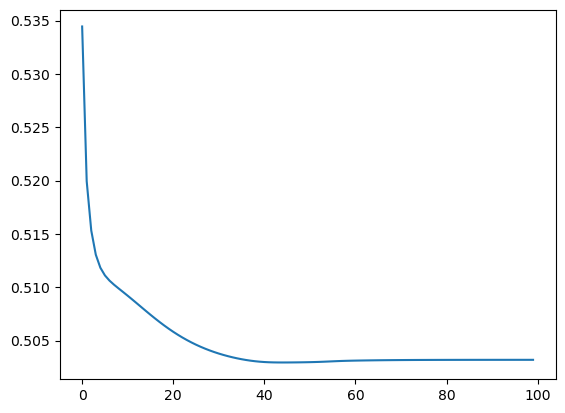

In [6]:
print(losses)
plt.plot(losses)

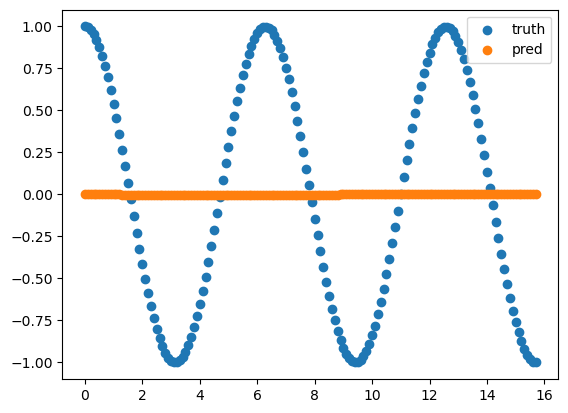

In [7]:
interval = np.arange(0,5*np.pi,0.1)
normalized_interval = interval/max(interval)
predictions = [model(torch.tensor(x).view(1)).item() for x in normalized_interval]

plt.scatter(interval, labels.cpu().numpy())
plt.scatter(interval, predictions)

plt.legend(["truth", "pred"])
plt.show()

In [8]:
raise EOFError()

EOFError: 

# Moons

In [10]:
from sklearn.datasets import make_moons

In [11]:
base = lambda x: x**3
model = KAN(n=1, base=base, G=3).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

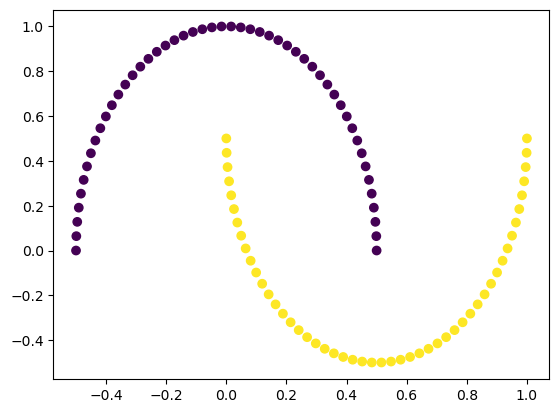

In [12]:
samples, labels = make_moons(n_samples=100, shuffle=True)

# Normalize Input
samples[:,0] = samples[:,0]/max(samples[:,0])
samples[:,1] = samples[:,1]/max(samples[:,1])

samples, labels = torch.from_numpy(samples), torch.from_numpy(labels)

criterion = nn.MSELoss()
#plt.scatter(normalized_samples, labels)

plt.scatter(samples[:,0], samples[:,1], c=labels)

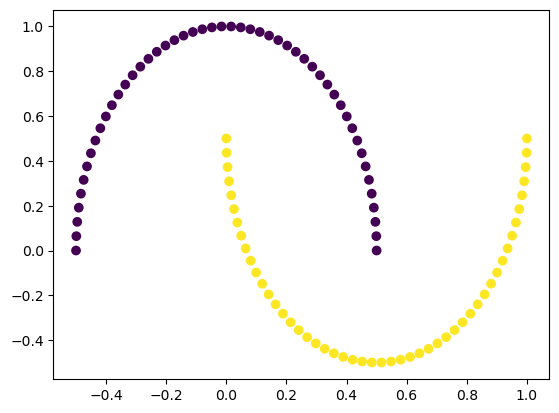

In [13]:
from sklearn.datasets import make_moons

samples, labels = make_moons(n_samples=100, shuffle=True)

# Normalize Input
samples[:,0] = samples[:,0]/max(samples[:,0])
samples[:,1] = samples[:,1]/max(samples[:,1])

samples, labels = torch.from_numpy(samples), torch.from_numpy(labels)

criterion = nn.MSELoss()
#plt.scatter(normalized_samples, labels)

plt.scatter(samples[:,0], samples[:,1], c=labels)

In [14]:
EPOCHS=100
losses = []
progess_bar = tqdm(range(EPOCHS))
for epoch in progess_bar:
    for x,y in zip(samples,labels):
        y_hat = model(x) 
        preds = y_hat.gt_(.5)
        
        loss = criterion(preds, y.double())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    progess_bar.set_description(f"Epoch {epoch}: Loss {loss.item()}")

Epoch 99: Loss 1.0: 100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


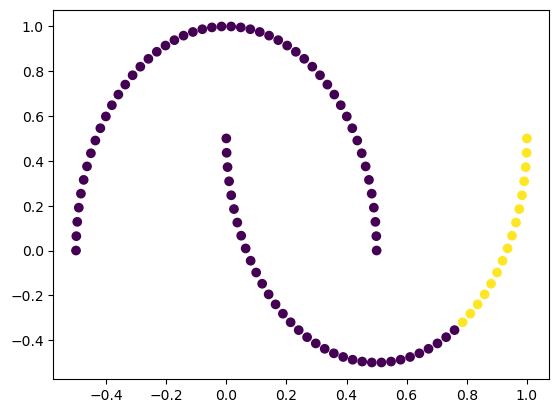

In [15]:
# interval = np.arange(0,5*np.pi,0.1)
# normalized_interval = interval/max(interval)
predictions = [model(x).gt_(.5).item() for x in samples]
plt.scatter(samples[:,0], samples[:,1], c=predictions)
# plt.scatter(samples, predicted_function)
# plt.legend(["pred", "truth"])
# plt.show()